In [113]:
import numpy as np
import librosa
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt

In [120]:
audio, sr = librosa.load("./audio/audio.flac", sr=16000)
n_fft = 1200
win_length = n_fft
hop_length = int(win_length/4)
hop_length = 2

In [121]:
S = librosa.core.stft(audio, n_fft=n_fft,  hop_length=hop_length, win_length=win_length)
S.shape, sr, audio.shape

((601, 15721), 16000, (31440,))

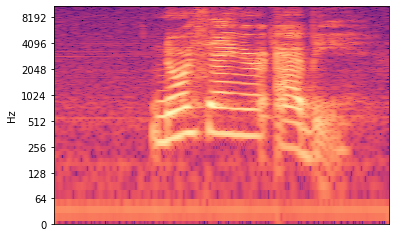

In [122]:
plt.figure()
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max, top_db=None), y_axis='log')
# librosa.display.specshow(S, y_axis='log')

In [97]:
melfb = librosa.filters.mel(sr=16000, n_fft=1200, n_mels=40)
melfb.shape

(40, 601)

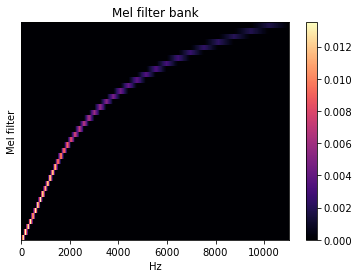

In [38]:
fig, ax = plt.subplots()
img = librosa.display.specshow(melfb, x_axis='linear', ax=ax)
ax.set(ylabel='Mel filter', title='Mel filter bank')
fig.colorbar(img, ax=ax)

In [39]:
magnitudes = np.abs(S) ** 2
mel = np.log10(np.dot(melfb, magnitudes,) + 1e-6)
magnitudes.shape, mel.shape

((601, 105), (40, 105))

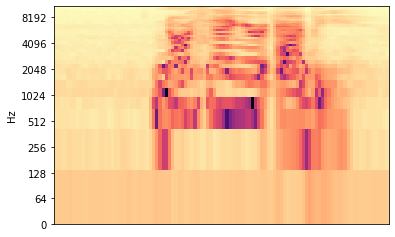

In [40]:
plt.figure()
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(mel, ref=np.max, top_db=None), y_axis='log')

In [80]:
mel2 = librosa.feature.melspectrogram(audio, sr=sr, n_mels=200)

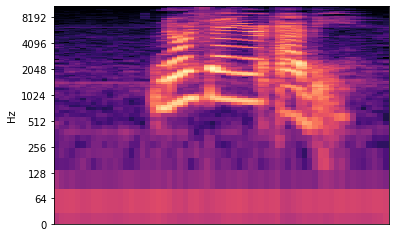

In [81]:
plt.figure()
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(mel2, ref=np.max, top_db=None), y_axis='log')

In [62]:
librosa.power_to_db(mel2, ref=np.max)

array([[-35.61915 , -33.095314, -32.64161 , ..., -33.105354, -32.73477 ,
        -31.402052],
       [-30.692265, -30.407907, -30.168037, ..., -30.226221, -30.180597,
        -30.673481],
       [-38.607384, -42.054405, -43.22267 , ..., -43.174793, -43.8667  ,
        -45.294334],
       ...,
       [-71.31302 , -74.37279 , -77.26117 , ..., -73.96785 , -73.044525,
        -73.63757 ],
       [-71.259186, -73.34287 , -75.94695 , ..., -75.699974, -73.94931 ,
        -75.85142 ],
       [-75.42595 , -74.98573 , -74.10739 , ..., -73.07419 , -73.31279 ,
        -74.48581 ]], dtype=float32)

In [ ]:
plt.figure()
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(mel2, ref=np.max, top_db=None), y_axis='log')